## Kaggle Boston Housing Dataset
## Source: https://www.kaggle.com/datasets/abhijithudayakumar/the-boston-housing-dataset
## Importing necessary libraries

- `import pandas as pd`  
  Imports the **pandas** library, which is commonly used for handling structured/tabular data.

- `path = ...`  
  Stores the file path of the **Boston Housing CSV** dataset as a string.

- `pd.read_csv(path)`  
  Reads the CSV file located at the specified path into a **DataFrame** named `df`.

- `df.shape`  
  Returns a tuple indicating the number of **rows and columns** in the dataset, e.g., `(506, 14)`.

- `df.columns.tolist()`  
  Lists the **names of all columns (features)** in the dataset as a Python list.


In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Define the path to the dataset (CSV file) on your local machine
path = (r"G:\Other computers\My Laptop\Education and Bootcamp\Internship\Developers Hub Internship\Task 4 Predicting House Prices Using the Boston Housing Dataset\Task_4_boston.csv")

# Read the CSV file into a DataFrame using pandas
df = pd.read_csv(path)

# Print the shape (rows, columns) and the list of column names
print(df.shape, df.columns.tolist())

(506, 14) ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


###  Feature Scaling Explanation

- `from sklearn.preprocessing import StandardScaler`  
  Imports the `StandardScaler` from Scikit-learn, which standardizes features by removing the mean and scaling to unit variance.

- `df.select_dtypes(...)`  
  Selects all numeric columns (`int64` and `float64`) from the dataset.

- `.drop('MEDV')`  
  Removes the target variable `'MEDV'` from the list of columns to be scaled.

- `scaler = StandardScaler()`  
  Creates an instance of the standard scaler.

- `scaler.fit_transform(df[num_cols])`  
  Fits the scaler on the numeric data and transforms it, replacing the original values with standardized ones (mean = 0, standard deviation = 1).


In [2]:
from sklearn.preprocessing import StandardScaler  # Import the scaler to normalize numerical features

# Select all numeric columns except the target variable 'MEDV'
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('MEDV')

scaler = StandardScaler()                         # Create a StandardScaler instance
df[num_cols] = scaler.fit_transform(df[num_cols]) # Apply standardization (mean=0, std=1) to numeric columns


### Splitting the Dataset

- `from sklearn.model_selection import train_test_split`  
  Imports the function to split the dataset into training and testing sets.

- `X = df.drop(columns='MEDV')`  
  Selects all columns **except** `'MEDV'` as feature variables (`X`).

- `y = df['MEDV']`  
  Selects `'MEDV'` as the target variable (`y`), which represents the house prices.

- `train_test_split(...)`  
  Splits the dataset into training and testing subsets:
  - `test_size=0.2` means 20% of the data is used for testing.
  - `random_state=42` ensures reproducibility of the split.


In [3]:
from sklearn.model_selection import train_test_split  # Import function to split the dataset

X = df.drop(columns='MEDV')   # Features: all columns except 'MEDV'
y = df['MEDV']                # Target: the column to predict

# Split data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Converting 'CHAS' to Integer

- `df['CHAS'] = df['CHAS'].astype(int)`  
  The `'CHAS'` column contains binary values (`0` or `1`) as strings.  
  This line converts them into integer type for proper numerical analysis.


In [4]:
df['CHAS'] = df['CHAS'].astype(int)   # Convert 'CHAS' column to integer type (from string)

###  LinearRegressionScratch (from scratch)

This class implements **Linear Regression** using the **Normal Equation**:

1. `fit(X, y)`:
   - Adds a bias column to the features.
   - Calculates the best-fit parameters using matrix algebra:
     \[
     \theta = (X^TX)^{-1}X^Ty
     \]
   - Stores the intercept and coefficients.

2. `predict(X)`:
   - Uses the learned parameters to predict target values.

Note: This is a simplified version and assumes no multicollinearity (X^T X must be invertible).


In [5]:
class LinearRegressionScratch:
    def __init__(self):
        self.coef_ = None         # Stores learned coefficients (slopes)
        self.intercept_ = None    # Stores the y-intercept

    def fit(self, X, y):
        # Add a column of ones to X to account for the intercept
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # Closed-form solution (Normal Equation)
        theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

        # Extract the intercept and coefficients
        self.intercept_ = theta_best[0]
        self.coef_ = theta_best[1:]
        
        return self  # Allows method chaining

    def predict(self, X):
        # Returns predicted values based on learned parameters
        return X.dot(self.coef_) + self.intercept_


###  DecisionTreeScratch (from scratch)

This is a manual implementation of a **Decision Tree Regressor** for numerical target prediction.

#### Key Concepts:

- **fit(X, y)**: Builds the tree recursively by selecting the best feature and threshold that minimize **Mean Squared Error (MSE)**.
- **predict(X)**: Uses the trained tree to predict values for new samples.
- **Feature Sampling**: `max_features` allows random subsetting of features (used in Random Forest).
- **Stopping Criteria**:
  - Minimum number of samples (`min_samples_split`)
  - Maximum tree depth (`max_depth`)
  - No further improvement in splitting

#### Notes:
- It does not support categorical features.
- It does not perform pruning.
- Designed for educational purposes and comparison with library models.


In [21]:
import numpy as np

class DecisionTreeScratch:
    def __init__(self, max_features=None, max_depth=None, min_samples_split=2):
        self.max_features = max_features              # Number of features to consider at each split
        self.max_depth = max_depth                    # Maximum depth of the tree
        self.min_samples_split = min_samples_split    # Minimum number of samples to split
        self.feature_index = None                     # Index of the feature used for the split
        self.threshold = None                         # Threshold value for the split
        self.left_child = None                        # Left subtree
        self.right_child = None                       # Right subtree
        self.value = None                             # Value for leaf nodes (mean prediction)

    def fit(self, X, y, depth=0):
        n_samples, n_features = X.shape

        # Stopping condition: leaf node
        if n_samples < self.min_samples_split or (self.max_depth is not None and depth >= self.max_depth):
            self.value = np.mean(y)
            return

        # Feature sampling (used in Random Forests)
        features = (
            np.random.choice(n_features, self.max_features, replace=False)
            if self.max_features else range(n_features)
        )

        # Find best split by minimizing MSE
        best_mse = float('inf')
        best_feature = None
        best_threshold = None

        for feature in features:
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] < threshold
                right_mask = ~left_mask

                if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                    continue

                # Compute MSE for left and right splits
                left_mean = np.mean(y[left_mask])
                right_mean = np.mean(y[right_mask])
                mse_left = np.mean((y[left_mask] - left_mean) ** 2)
                mse_right = np.mean((y[right_mask] - right_mean) ** 2)
                mse = (mse_left * np.sum(left_mask) + mse_right * np.sum(right_mask)) / n_samples

                # Keep the best split
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature
                    best_threshold = threshold

        if best_feature is None:
            self.value = np.mean(y)
            return

        # Store split details
        self.feature_index = best_feature
        self.threshold = best_threshold

        # Recursively grow left and right branches
        left_indices = X[:, self.feature_index] < self.threshold
        right_indices = ~left_indices

        self.left_child = DecisionTreeScratch(max_features=self.max_features, max_depth=self.max_depth, min_samples_split=self.min_samples_split)
        self.left_child.fit(X[left_indices], y[left_indices], depth + 1)

        self.right_child = DecisionTreeScratch(max_features=self.max_features, max_depth=self.max_depth, min_samples_split=self.min_samples_split)
        self.right_child.fit(X[right_indices], y[right_indices], depth + 1)

    def predict_single(self, x):
        # Predict a single instance by traversing the tree
        if self.value is not None:
            return self.value

        if x[self.feature_index] < self.threshold:
            return self.left_child.predict_single(x)
        else:
            return self.right_child.predict_single(x)

    def predict(self, X):
        # Predict multiple samples
        return np.array([self.predict_single(x) for x in X])

    def get_split_feature_index(self):
        # Used for feature importance (e.g., in Random Forest)
        return self.feature_index
    
    def get_feature_importance_array(self, n_features):
    
        importances = np.zeros(n_features)

    def recurse(node):
        if node is None or node.feature_index is None:
            return
        importances[node.feature_index] += 1
        recurse(node.left_child)
        recurse(node.right_child)

        recurse(self)
        return importances



# RandomForestScratch Class

This class implements a simplified version of a Random Forest model from scratch. It builds an ensemble of decision trees and averages their outputs for regression tasks.

## Parameters:
- `n_estimators`: Number of decision trees in the forest (default: 10).
- `max_features`: Maximum number of features considered when splitting a node.
- `max_depth`: Maximum depth each tree can grow.
- `min_samples_split`: Minimum number of samples required to split an internal node.

## Methods:

### `fit(X, y)`
Trains the random forest model.
- Uses bootstrap aggregation (bagging) to sample training data for each tree.
- Trains each `DecisionTreeScratch` on a different sample.

### `predict(X)`
Predicts the output by averaging the predictions from all trees.

### `get_feature_importance_array(n_features=None)`
Returns an array of feature importances.
- Counts how often each feature was used to split across all trees.
- Normalizes the result so that the importances sum to 1 (or the average contribution per tree).

> **Note**: This implementation assumes the existence of a `DecisionTreeScratch` class with a `.predict()` method and a `.get_split_feature_index()` method.


In [ ]:
class RandomForestScratch:
    def __init__(self, n_estimators=10, max_features=None, max_depth=None, min_samples_split=2):
        # Initialize the random forest with parameters for number of trees, features per split, depth, and minimum samples
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.trees = []  # List to hold individual decision trees

    def fit(self, X, y):
        # Fit the forest to the data
        self.n_features_ = X.shape[1]  # Save number of features
        self.trees = []  # Clear any existing trees

        for i in range(self.n_estimators):
            # Bootstrap sampling: randomly sample data points with replacement
            idx = np.random.choice(len(X), len(X), replace=True)
            X_sample, y_sample = X[idx], y[idx]

            # Create and train a new decision tree on the sampled data
            tree = DecisionTreeScratch(
                max_features=self.max_features,
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X_sample, y_sample)

            # Add the trained tree to the forest
            self.trees.append(tree)

        return self

    def predict(self, X):
        # Aggregate predictions from all trees
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        # Return average prediction across trees (suitable for regression)
        return np.mean(tree_preds, axis=0)

    def get_feature_importance_array(self, n_features=None):
        # Compute how frequently each feature was used to split nodes
        if n_features is None:
            n_features = self.n_features_
        
        importances = np.zeros(n_features)
        for tree in self.trees:
            idx = tree.get_split_feature_index()
            if idx is not None:
                importances[idx] += 1
        
        # Normalize by number of trees to get relative importance
        return importances / len(self.trees)


# OGBoostScratch CLass

This class implements a basic version of Gradient Boosting for regression, inspired by popular libraries like XGBoost and LightGBM.

## Parameters:
- **n_estimators** (`int`): Number of boosting iterations (default: 100).
- **learning_rate** (`float`): Shrinkage rate applied to tree outputs (default: 0.1).
- **max_features** (`int` or `None`): Number of features to consider when looking for the best split.
- **max_depth** (`int` or `None`): Maximum depth of each decision tree.
- **min_samples_split** (`int`): Minimum samples required to split a node.
- **early_stopping_rounds** (`int` or `None`): Number of rounds with no improvement on validation set to stop training early.
- **validation_fraction** (`float`): Fraction of training data used for validation if early stopping is enabled.
- **tol** (`float`): Minimum improvement in validation loss to reset early stopping counter.
- **random_state** (`int` or `None`): Seed for reproducibility.

## Methods:

### `fit(X, y)`
Trains the boosting model on dataset `(X, y)`:
- Initializes the model with the mean of `y`.
- Iteratively fits trees on residuals (errors) and updates predictions.
- Supports optional early stopping using a validation split.

### `predict(X)`
Predicts output values for the input data `X` using:


In [8]:
class OGBoostScratch:
    def __init__(self, 
                 n_estimators=100, 
                 learning_rate=0.1, 
                 max_features=None,
                 max_depth=None,
                 min_samples_split=2,
                 early_stopping_rounds=None,
                 validation_fraction=0.1,
                 tol=1e-4,
                 random_state=None):
        # Initialize hyperparameters for gradient boosting
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_features = max_features
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.early_stopping_rounds = early_stopping_rounds
        self.validation_fraction = validation_fraction
        self.tol = tol
        self.random_state = random_state
        self.trees = []      # List to store individual trees
        self.init_pred = None  # Initial prediction (usually mean of y)

    def fit(self, X, y):
        # Set seed for reproducibility
        if self.random_state is not None:
            np.random.seed(self.random_state)

        n_samples = X.shape[0]

        # If early stopping is enabled, split into training and validation sets
        if self.early_stopping_rounds is not None:
            val_size = int(n_samples * self.validation_fraction)
            idxs = np.arange(n_samples)
            np.random.shuffle(idxs)
            train_idx, val_idx = idxs[val_size:], idxs[:val_size]
            X_train, y_train = X[train_idx], y[train_idx]
            X_val, y_val = X[val_idx], y[val_idx]
        else:
            X_train, y_train = X, y
            X_val, y_val = None, None

        # Initial prediction: mean of training labels
        self.init_pred = np.mean(y_train)
        F = np.full_like(y_train, fill_value=self.init_pred, dtype=float)  # Predicted values

        self.trees = []
        best_val_loss = float('inf')
        rounds_no_improve = 0

        for i in range(self.n_estimators):
            # Compute residuals (negative gradients for MSE loss)
            residuals = y_train - F

            # Fit a regression tree on the residuals
            tree = DecisionTreeScratch(
                max_features=self.max_features,
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split
            )
            tree.fit(X_train, residuals)
            self.trees.append(tree)

            # Update prediction with scaled tree output
            update = self.learning_rate * tree.predict(X_train)
            F += update

            # Early stopping check
            if X_val is not None:
                val_pred = self.predict(X_val)
                val_loss = np.mean((y_val - val_pred) ** 2)
                if best_val_loss - val_loss > self.tol:
                    best_val_loss = val_loss
                    rounds_no_improve = 0
                else:
                    rounds_no_improve += 1
                    if rounds_no_improve >= self.early_stopping_rounds:
                        print(f"Early stopping at iteration {i+1}, best val loss: {best_val_loss:.5f}")
                        break

        return self

    def predict(self, X):
        # Predict using the ensemble: initial prediction + sum of tree outputs
        y_pred = np.full((X.shape[0],), fill_value=self.init_pred, dtype=float)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

    def get_feature_importance_array(self, n_features=None):
        # Aggregate feature importances from all trees
        if n_features is None:
            try:
                n_features = self.trees[0].n_features_
            except IndexError:
                raise ValueError("Please pass n_features or fit the model first.")

        importances = np.zeros(n_features, dtype=float)
        for tree in self.trees:
            importances += tree.get_feature_importance_array(n_features)
        importances /= len(self.trees)  # Normalize importances
        return importances

# CrossValScoreScratch

This function performs k-fold cross-validation for models built from scratch.

## Parameters:
- **model_class** (`class`): The custom model class to be used (e.g., `RandomForestScratch`, `OGBoostScratch`).
- **X** (`numpy.ndarray`): Feature matrix.
- **y** (`numpy.ndarray`): Target vector.
- **cv** (`int`, default = 5): Number of folds in cross-validation.
- **model_params**: Additional keyword arguments to initialize the model.

## Returns:
- **mean_rmse** (`float`): Average Root Mean Squared Error across all folds.
- **mean_r2** (`float`): Average R² (coefficient of determination) score across all folds.

## How it Works:
1. Randomly shuffles the dataset.
2. Splits it into `cv` folds.
3. Iteratively trains the model on `cv-1` folds and evaluates it on the remaining fold.
4. Collects RMSE and R² metrics for each fold.
5. Returns the average RMSE and R².

> This function is useful for comparing model performance using standard cross-validation metrics, especially when working with custom machine learning models built from scratch.


In [9]:
# Cross-validation function for scratch-built models
def cross_val_score_scratch(model_class, X, y, cv=5, **model_params):
    n_samples = X.shape[0]
    indices = np.arange(n_samples)  # Array of all sample indices
    np.random.shuffle(indices)      # Shuffle indices for randomness

    # Determine fold sizes for cross-validation
    fold_sizes = (n_samples // cv) * np.ones(cv, dtype=int)
    fold_sizes[:n_samples % cv] += 1  # Distribute remaining samples to first few folds

    current = 0
    rmses = []  # Store RMSE scores for each fold
    r2s = []    # Store R² scores for each fold

    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        val_idx = indices[start:stop]  # Indices for validation fold
        train_idx = np.concatenate([indices[:start], indices[stop:]])  # Rest is training data

        X_train, y_train = X[train_idx], y[train_idx]
        X_val, y_val = X[val_idx], y[val_idx]

        # Initialize and train model with given parameters
        model = model_class(**model_params)
        model.fit(X_train, y_train)

        # Make predictions on validation set
        preds = model.predict(X_val)

        # Compute RMSE
        rmse = np.sqrt(np.mean((y_val - preds) ** 2))

        # Compute R² score
        r2 = 1 - np.sum((preds - y_val) ** 2) / np.sum((y_val - np.mean(y_val)) ** 2)

        # Store metrics
        rmses.append(rmse)
        r2s.append(r2)

        current = stop

    # Return average RMSE and R² across folds
    return np.mean(rmses), np.mean(r2s)

# Model Comparison: Linear Regression, Random Forest, and Gradient Boosting (Scratch)

This script evaluates the performance of three machine learning models implemented from scratch.

## 1. Metric Functions
- `rmse(y_true, y_pred)`: Computes Root Mean Squared Error (lower is better).
- `r2_score(y_true, y_pred)`: Computes the R² score (closer to 1 is better).

## 2. Model Training
- **LinearRegressionScratch**: Trained on `X_train`, `y_train`.
- **RandomForestScratch**: Trained with 50 trees and a maximum of 5 features per split.
- **OGBoostScratch**: Gradient boosting with 50 iterations and a learning rate of 0.05.

## 3. Prediction and Evaluation
Each model predicts on `X_test`, and the predictions are evaluated using RMSE and R² metrics. The results are printed in a loop for easy comparison.




In [10]:
# Metric functions 
def rmse(y_true, y_pred):
    # Computes Root Mean Squared Error
    return np.sqrt(np.mean((y_true - y_pred)**2))

def r2_score(y_true, y_pred):
    # Computes R-squared (coefficient of determination)
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

# 1. Train all models 

# Linear Regression (from scratch)
lin = LinearRegressionScratch().fit(X_train.values, y_train.values)

# Random Forest with 50 trees and 5 features max per split
rf = RandomForestScratch(
    n_estimators=50,
    max_features=5
).fit(X_train.values, y_train.values)

# Gradient Boosting without setting max_depth
ogb = OGBoostScratch(
    n_estimators=50,
    learning_rate=0.05,
    max_features=5
).fit(X_train.values, y_train.values)

# 2. Predict on test set 
y_pred_lin = lin.predict(X_test.values)
y_pred_rf  = rf.predict(X_test.values)
y_pred_ogb = ogb.predict(X_test.values)

#  3. Evaluate and print metrics for each model 
for name, y_pred in [
    ("LinearRegressionScratch", y_pred_lin),
    ("RandomForestScratch",     y_pred_rf),
    ("OGBoostScratch",          y_pred_ogb),
]:
    e_rmse = rmse(y_test.values, y_pred)
    e_r2   = r2_score(y_test.values, y_pred)
    print(f"{name:20s} → RMSE = {e_rmse: .3f} | R² = {e_r2: .3f}")

LinearRegressionScratch → RMSE =  4.929 | R² =  0.669
RandomForestScratch  → RMSE =  2.850 | R² =  0.889
OGBoostScratch       → RMSE =  2.761 | R² =  0.896


# Model Performance Comparison: Scratch vs Library

This script compares the performance of scratch-implemented machine learning models with their library-based counterparts using RMSE and R² metrics.



## Models Evaluated

### **1. Scratch Implementations**
| Name                 | Description                         |
|----------------------|-------------------------------------|
| `LinearScratch`      | Linear regression from scratch      |
| `RandomForestScratch`| Random forest ensemble (custom)     |
| `OGBoostScratch`     | Gradient boosting from scratch      |

### **2. Library Implementations**
| Model                 | Library   | Key Parameters                        |
|------------------------|------------|----------------------------------------|
| `LinearRegression`     | `sklearn`  | Default settings                       |
| `RandomForestRegressor`| `sklearn`  | 50 trees, `max_features=5`, `seed=42` |
| `XGBRegressor`         | `xgboost`  | 100 estimators, LR=0.1, `depth=3`     |




## Evaluation Metrics:
- **RMSE**: Root Mean Squared Error (lower is better)
- **R² Score**: Coefficient of determination (closer to 1 is better)





In [11]:
# 1. Import “library” models
from sklearn.linear_model    import LinearRegression
from sklearn.ensemble        import RandomForestRegressor
from xgboost                 import XGBRegressor   # or: from sklearn.ensemble import GradientBoostingRegressor

# 2) Define your scratch models (assuming you already have these)
# lin_scratch = LinearRegressionScratch().fit(...)
# rf_scratch  = RandomForestScratch(...).fit(...)
# ogb_scratch = OGBoostScratch(...).fit(...)

# 3. Instantiate and fit the library versions
models_lib = {
    'LinearRegression'        : LinearRegression(),
    'RandomForestRegressor'   : RandomForestRegressor(n_estimators=50, max_features=5, random_state=42),
    'XGBRegressor'            : XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

for name, mdl in models_lib.items():
    mdl.fit(X_train, y_train)

# 4. Collect predictions & metrics
results = []

# — scratch models
for name, y_pred in [
    ('LinearScratch',        lin.predict(X_test.values)),
    ('RandomForestScratch',  rf.predict(X_test.values)),
    ('OGBoostScratch',       ogb.predict(X_test.values)),
]:
    results.append({
        'Model': name,
        'RMSE' : rmse(y_test.values, y_pred),
        'R2'   : r2_score(y_test.values, y_pred)
    })

# library models
for name, mdl in models_lib.items():
    y_pred = mdl.predict(X_test)  # sklearn/XGB accept DataFrame or array
    results.append({
        'Model': name,
        'RMSE' : rmse(y_test.values, y_pred),
        'R2'   : r2_score(y_test.values, y_pred)
    })

# 5. Display comparison
import pandas as pd
compare_df = pd.DataFrame(results).set_index('Model')
print(compare_df)


                           RMSE        R2
Model                                    
LinearScratch          4.928602  0.668759
RandomForestScratch    2.850046  0.889236
OGBoostScratch         2.761003  0.896049
LinearRegression       4.928602  0.668759
RandomForestRegressor  3.198035  0.860536
XGBRegressor           2.557355  0.910818


### **Visualizing Feature Importance**

#### **Imports**
- **`matplotlib.pyplot`**: A popular library for creating static plots in Python.
- **`seaborn`**: A statistical data visualization library based on `matplotlib` that provides a high-level interface for drawing attractive and informative graphics.
- **`warnings`**: Python’s built-in module for issuing and managing warnings. `warnings.filterwarnings("ignore")` is used to suppress all warnings from showing in the output.

#### **Helper Function: `plot_feature_importance`**

**Inputs:**
- **`model`**: The trained model object (e.g., `RandomForestRegressor`, `XGBRegressor`).
- **`model_name`**: The name of the model as a string (e.g., "RandomForestRegressor").
- **`feature_names`**: The names of the features/columns in the input data.

**Functionality:**
1. Extracts the feature importance scores from the model using `model.feature_importances_`.
2. Creates a pandas DataFrame that pairs the feature names with their corresponding importance scores, sorting them in descending order of importance.
3. Plots the feature importance using seaborn’s `barplot` function, displaying the importance of each feature as a horizontal bar.
4. The plot is displayed with proper labels, and the layout is adjusted to ensure everything fits properly.

#### **Plotting for Two Models**

- **`RandomForestRegressor`** and **`XGBRegressor`** models are used to plot the feature importance by calling `plot_feature_importance()` with each model from the `models_lib` dictionary.
    - **`models_lib['RandomForestRegressor']`**: Retrieves the `RandomForestRegressor` model from the `models_lib` dictionary.
    - **`models_lib['XGBRegressor']`**: Retrieves the `XGBRegressor` model from the same dictionary.
    - **`X_train.columns`**: Provides the names of the features (columns) from the training data `X_train` to label the plot.


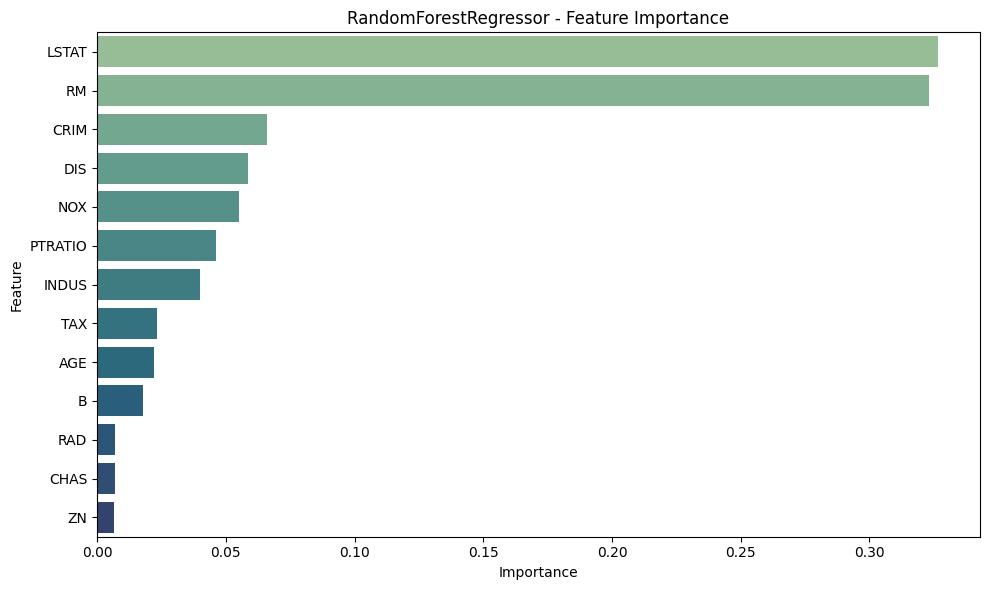

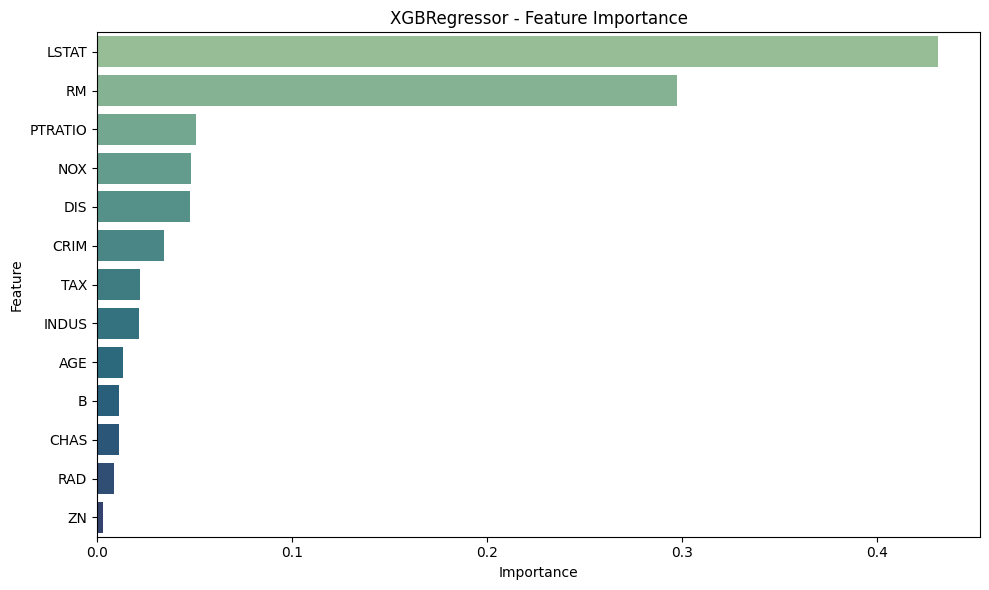

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns  # For statistical data visualization
import warnings  # For controlling warning messages

# Suppress all warnings to ensure clean output
warnings.filterwarnings("ignore")

# ## Helper Function: plot_feature_importance
# This function plots the feature importance of a given model using a bar plot.
# It takes the trained model, its name, and the feature names as input.
def plot_feature_importance(model, model_name, feature_names):
    # Extract feature importances from the trained model
    importance = model.feature_importances_
    
    # Create a DataFrame to organize feature names and their respective importances
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)  # Sort by importance, descending
    
    # Plotting the feature importance using seaborn
    plt.figure(figsize=(10, 6))  # Set the size of the plot
    sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='crest')  # Create the bar plot
    plt.title(f'{model_name} - Feature Importance')  # Set the title of the plot
    plt.tight_layout()  # Adjust layout to avoid overlapping elements
    plt.show()  # Display the plot

# ## Plot Feature Importance for Models

# Plotting feature importance for the RandomForestRegressor model
plot_feature_importance(models_lib['RandomForestRegressor'], "RandomForestRegressor", X_train.columns)

# Plotting feature importance for the XGBRegressor model
plot_feature_importance(models_lib['XGBRegressor'], "XGBRegressor", X_train.columns)
